## ETL Project (Spar Nord Bank ATM Data Mart) by Dheeraj Mishra


In [1]:
spark


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1664082536522_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
file1 = spark.read.load("part-m-00000", format = "csv", inferSchema = True, header = True)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
file1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+------+---+--------+---+---+----------+-------------------+---+----+------+------+---+----------+----+----------+----+----+------+------+-------+--------------+-------+----+---+---+---+-----+---+---+-------+--------------------+
|2017|January| 12|Sunday|  0|  Active| 16|NCR|NÃƒÂ¦stved|        Farimagsvej|  8|4700|55.233|11.763|DKK|MasterCard|5643|Withdrawal|_c18|_c19|55.230|11.761|2616038|      Naestved|281.150|1014| 87|  7|260|0.215| 92|500|   Rain|          light rain|
+----+-------+---+------+---+--------+---+---+----------+-------------------+---+----+------+------+---+----------+----+----------+----+----+------+------+-------+--------------+-------+----+---+---+---+-----+---+---+-------+--------------------+
|2017|January|  1|Sunday|  0|Inactive|  2|NCR|  Vejgaard|         Hadsundvej| 20|9000|57.043|  9.95|DKK|MasterCard|1764|Withdrawal|null|null|57.048| 9.935|2616235|NÃƒÂ¸rresundby| 280.64|1020| 93|  9|250| 0.59| 92|500|   Rain|          light rain|
|2017|Januar

In [4]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, BooleanType, DoubleType, LongType


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
newSchema = StructType([StructField('year', IntegerType(), nullable = True),
                        StructField('month', StringType(), True),
                        StructField('day', IntegerType(), True),
                        StructField('weekday', StringType(), True),
                        StructField('hour', IntegerType(), True),
                        StructField('atm_status', StringType(), True),
                        StructField('atm_id', StringType(), True),
                        StructField('atm_manufacturer', StringType(), True),
                        StructField('atm_location', StringType(), True),
                        StructField('atm_streetname', StringType(), True),
                        StructField('atm_street_number', IntegerType(), True),
                        StructField('atm_zipcode', IntegerType(), True),
                        StructField('atm_lat', DoubleType(), True),
                        StructField('atm_lon', DoubleType(), True),
                        StructField('currency', StringType(), True),
                        StructField('card_type', StringType(), True),
                        StructField('transaction_amount', IntegerType(), True),
                        StructField('service', StringType(), True),
                        StructField('message_code', StringType(), True),
                        StructField('message_text', StringType(), True),
                        StructField('weather_lat', DoubleType(), True),
                        StructField('weather_lon', DoubleType(), True),
                        StructField('weather_city_id', IntegerType(), True),
                        StructField('weather_city_name', StringType(), True),
                        StructField('temp', DoubleType(), True),
                        StructField('pressure', IntegerType(), True),
                        StructField('humidity', IntegerType(), True),
                        StructField('wind_speed', IntegerType(), True),
                        StructField('wind_deg', IntegerType(), True),
                        StructField('rain_3h', DoubleType(), True),
                        StructField('clouds_all', IntegerType(), True),
                        StructField('weather_id', IntegerType(), True),
                        StructField('weather_main', StringType(), True),
                        StructField('weather_description', StringType(), True)])


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
df = spark.read.csv("part-m-00000", header = False, schema = newSchema)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-------+---+-------+----+----------+------+----------------+------------+-------------------+-----------------+-----------+-------+-------+--------+----------+------------------+----------+------------+------------+-----------+-----------+---------------+-----------------+------+--------+--------+----------+--------+-------+----------+----------+------------+--------------------+
|year|  month|day|weekday|hour|atm_status|atm_id|atm_manufacturer|atm_location|     atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|currency| card_type|transaction_amount|   service|message_code|message_text|weather_lat|weather_lon|weather_city_id|weather_city_name|  temp|pressure|humidity|wind_speed|wind_deg|rain_3h|clouds_all|weather_id|weather_main| weather_description|
+----+-------+---+-------+----+----------+------+----------------+------------+-------------------+-----------------+-----------+-------+-------+--------+----------+------------------+----------+------------+------------+-

In [8]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- year: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- weekday: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- atm_status: string (nullable = true)
 |-- atm_id: string (nullable = true)
 |-- atm_manufacturer: string (nullable = true)
 |-- atm_location: string (nullable = true)
 |-- atm_streetname: string (nullable = true)
 |-- atm_street_number: integer (nullable = true)
 |-- atm_zipcode: integer (nullable = true)
 |-- atm_lat: double (nullable = true)
 |-- atm_lon: double (nullable = true)
 |-- currency: string (nullable = true)
 |-- card_type: string (nullable = true)
 |-- transaction_amount: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- message_code: string (nullable = true)
 |-- message_text: string (nullable = true)
 |-- weather_lat: double (nullable = true)
 |-- weather_lon: double (nullable = true)
 |-- weather_city_id: integer (nullable = true)
 |-- weather_city_name: st

In [9]:
#Checking  count after importing data into a dataframe
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

# making Dimensions table

In [10]:
from pyspark.sql.functions import *
from pyspark.sql.window import *


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## 1.Required DIM_LOCATION schema
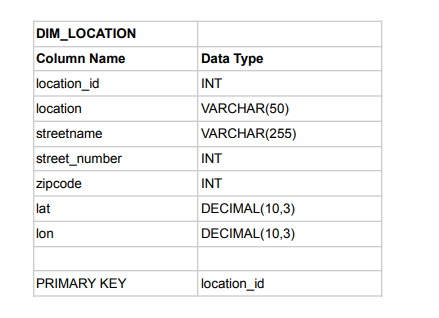

In [11]:
location = df.select('atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [12]:
location.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------------------+-----------------+-----------+-------+-------+
|    atm_location|     atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|
+----------------+-------------------+-----------------+-----------+-------+-------+
|         Kolding|           Vejlevej|              135|       6000| 55.505|  9.457|
|  Skelagervej 15|        Skelagervej|               15|       9000| 57.023|  9.891|
|Intern HolbÃƒÂ¦k|        Slotsvolden|                7|       4300| 55.718| 11.704|
|          Odense|       FÃƒÂ¦lledvej|                3|       5000| 55.394|  10.37|
|           Ikast|RÃƒÂ¥dhusstrÃƒÂ¦det|               12|       7430| 56.139|  9.154|
|         Randers|       ÃƒËœstervold|               16|       8900| 56.462| 10.038|
|         Esbjerg|       Strandbygade|               20|       6700| 55.468|   8.44|
|          Lyngby|        Jernbanevej|                6|       2800| 55.772|   12.5|
|           Skive|           Adelgade|                8|       78

###  now we are going to add unique location id  column and rearranging the columns
The zipWithIndex() function is only available within RDDs. You cannot use it directly on a DataFrame. Convert your DataFrame to a RDD, apply zipWithIndex() to your data, and then convert the RDD back to a DataFrame

In [13]:
dfl1=location.rdd.zipWithIndex().toDF()
dfl2=dfl1.select(col("_1.*"),col("_2").alias('location_id'))
dfl2.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+-------------------+-----------------+-----------+-------+-------+-----------+
|    atm_location|     atm_streetname|atm_street_number|atm_zipcode|atm_lat|atm_lon|location_id|
+----------------+-------------------+-----------------+-----------+-------+-------+-----------+
|         Kolding|           Vejlevej|              135|       6000| 55.505|  9.457|          0|
|  Skelagervej 15|        Skelagervej|               15|       9000| 57.023|  9.891|          1|
|Intern HolbÃƒÂ¦k|        Slotsvolden|                7|       4300| 55.718| 11.704|          2|
|          Odense|       FÃƒÂ¦lledvej|                3|       5000| 55.394|  10.37|          3|
|           Ikast|RÃƒÂ¥dhusstrÃƒÂ¦det|               12|       7430| 56.139|  9.154|          4|
|         Randers|       ÃƒËœstervold|               16|       8900| 56.462| 10.038|          5|
|         Esbjerg|       Strandbygade|               20|       6700| 55.468|   8.44|          6|
|          Lyngby|        Jern

In [14]:
# renaming the colums and rearranging as per schema given
DIM_LOCATION = dfl2.withColumnRenamed('atm_location','location').withColumnRenamed('atm_streetname','streetname').withColumnRenamed('atm_street_number','street_number').withColumnRenamed('atm_zipcode','zipcode').withColumnRenamed('atm_lat','lat').withColumnRenamed('atm_lon','lon').select('location_id', 'location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
DIM_LOCATION.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+----------------+-------------------+-------------+-------+------+------+
|location_id|        location|         streetname|street_number|zipcode|   lat|   lon|
+-----------+----------------+-------------------+-------------+-------+------+------+
|          0|         Kolding|           Vejlevej|          135|   6000|55.505| 9.457|
|          1|  Skelagervej 15|        Skelagervej|           15|   9000|57.023| 9.891|
|          2|Intern HolbÃƒÂ¦k|        Slotsvolden|            7|   4300|55.718|11.704|
|          3|          Odense|       FÃƒÂ¦lledvej|            3|   5000|55.394| 10.37|
|          4|           Ikast|RÃƒÂ¥dhusstrÃƒÂ¦det|           12|   7430|56.139| 9.154|
|          5|         Randers|       ÃƒËœstervold|           16|   8900|56.462|10.038|
|          6|         Esbjerg|       Strandbygade|           20|   6700|55.468|  8.44|
|          7|          Lyngby|        Jernbanevej|            6|   2800|55.772|  12.5|
|          8|           Skive|           Ad

In [16]:
#Check count for the Location Dimension
DIM_LOCATION.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

109

## 2.Required DIM_ATM schema
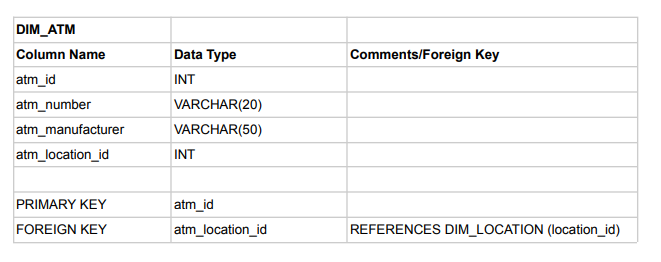

In [17]:
atm = df.select('atm_id', 'atm_manufacturer', 'atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon').withColumnRenamed('atm_id', 'atm_number')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
atm = atm.join(dfl2, on = ['atm_location', 'atm_streetname', 'atm_street_number', 'atm_zipcode', 'atm_lat', 'atm_lon'], how = "left")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
# selecting the required columns and making sure records are distinct
atm = atm.select('atm_number', 'atm_manufacturer', 'location_id').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
# renaming the colums as per requirement
atm = atm.withColumnRenamed('location_id', 'atm_location_id')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
# creating the primary key column
dfa = atm.rdd.zipWithIndex().toDF()
dfa2 = dfa.select(col("_1.*"),col("_2").alias('atm_id'))
dfa2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+----------------+---------------+------+
|atm_number|atm_manufacturer|atm_location_id|atm_id|
+----------+----------------+---------------+------+
|        53|             NCR|             28|     0|
|        40| Diebold Nixdorf|             86|     1|
|        28|             NCR|             33|     2|
|        66|             NCR|             20|     3|
|        49|             NCR|            103|     4|
+----------+----------------+---------------+------+
only showing top 5 rows

In [22]:
# rearranging the columns according to the target model
DIM_ATM = dfa2.select('atm_id', 'atm_number', 'atm_manufacturer', 'atm_location_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
DIM_ATM.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+----------+----------------+---------------+
|atm_id|atm_number|atm_manufacturer|atm_location_id|
+------+----------+----------------+---------------+
|     0|        53|             NCR|             28|
|     1|        40| Diebold Nixdorf|             86|
|     2|        28|             NCR|             33|
|     3|        66|             NCR|             20|
|     4|        49|             NCR|            103|
+------+----------+----------------+---------------+
only showing top 5 rows

In [24]:
#Check count for the ATM Dimension
DIM_ATM.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

113

## 3.Required DIM_DATE schema
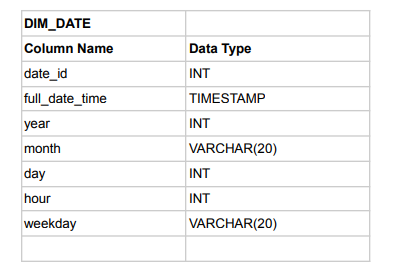

In [25]:
# creating a temporary df and selecting required columns
date = df.select('year', 'month', 'day', 'hour', 'weekday')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
#Concat_ws() will join two or more columns in the given PySpark DataFrame and add these values into a new column. It will separate each column’s values with a separator.
#PySpark lit() function is used to add constant or literal value as a new column to the DataFrame.     
# we are concating [year,month ,day] to form full_date and hour and adding lit(00) to make a complete time format alias is full_time

date=date.withColumn('full_date', concat_ws('-', date.year, date.month, date.day)).withColumn('full_time',concat_ws(':',date.hour,lit('00'),lit('00')))
                                                    

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
date=date.withColumn('full_date_time',concat_ws(' ',date.full_date,date.full_time))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
pattern = 'yyyy-MMM-dd HH:mm:ss'
date = date.withColumn('full_date_time', unix_timestamp(date.full_date_time, pattern).cast('timestamp')).distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
# creating the primary key column
dfd = date.rdd.zipWithIndex().toDF()
dfd2 = dfd.select(col("_1.*"),col("_2").alias('date_id'))
DIM_DATE=dfd2.select('date_id', 'full_date_time','year', 'month', 'day', 'hour', 'weekday')
DIM_DATE.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+----+--------+---+----+--------+
|date_id|     full_date_time|year|   month|day|hour| weekday|
+-------+-------------------+----+--------+---+----+--------+
|      0|2017-02-06 23:00:00|2017|February|  6|  23|  Monday|
|      1|2017-01-30 07:00:00|2017| January| 30|   7|  Monday|
|      2|2017-02-06 21:00:00|2017|February|  6|  21|  Monday|
|      3|2017-02-10 21:00:00|2017|February| 10|  21|  Friday|
|      4|2017-02-16 18:00:00|2017|February| 16|  18|Thursday|
+-------+-------------------+----+--------+---+----+--------+
only showing top 5 rows

In [30]:
DIM_DATE.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

8685

## 4.Required DIM_CARD_TYPE schema
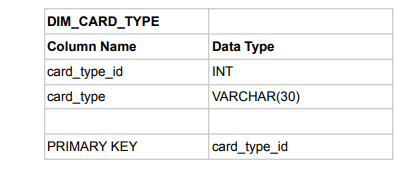

In [31]:
# creating a temporary df and selecting required columns
card = df.select('card_type').distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
# creating the primary key column
dfc = card.rdd.zipWithIndex().toDF()
dfc2 = dfc.select(col("_1.*"),col("_2").alias('card_type_id'))
DIM_CARD_TYPE=dfc2.select('card_type_id', 'card_type')
DIM_CARD_TYPE.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+--------------------+
|card_type_id|           card_type|
+------------+--------------------+
|           0|Visa Dankort - on-us|
|           1|  Mastercard - on-us|
|           2|         HÃƒÂ¦vekort|
|           3|            VisaPlus|
|           4|     Dankort - on-us|
+------------+--------------------+
only showing top 5 rows

In [33]:
#Check count for the Card Type Dimension
DIM_CARD_TYPE.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

## 4.Required FACT_ATM_TRANS schema
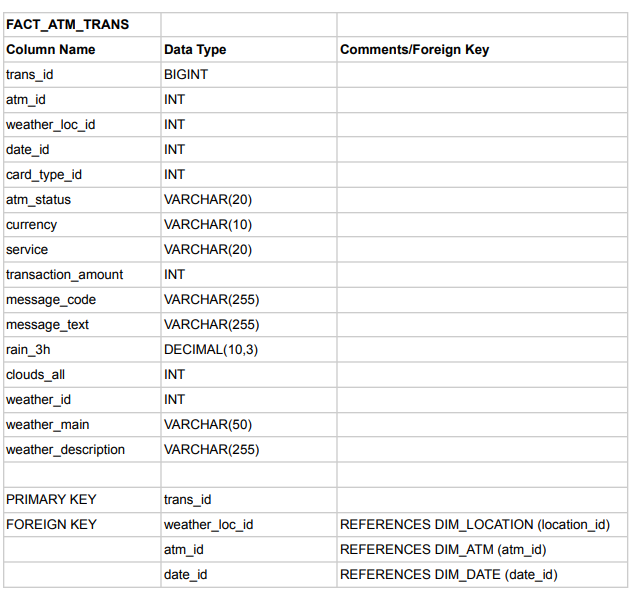

## First stage 
1. joining the main dataframe with the DIM_LOCATION to get weather_loaction_id

In [34]:
#making fact_atm_trans with renaming the columns
fact_loc = df.withColumnRenamed('atm_location','location').withColumnRenamed('atm_streetname','streetname').withColumnRenamed('atm_street_number','street_number').withColumnRenamed('atm_zipcode','zipcode').withColumnRenamed('atm_lat','lat').withColumnRenamed('atm_lon','lon')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [35]:
# joining the dfs
fact_loc = fact_loc.join(DIM_LOCATION, on = ['location', 'streetname', 'street_number', 'zipcode', 'lat', 'lon'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
# Validating the count of the df at the end of Stage 1
fact_loc.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

## second stage 
1. joining the fact_loc with the DIM_ATM to get atm_id

In [37]:
# renaming the colums as per requirement
fact_loc = fact_loc.withColumnRenamed('atm_id', 'atm_number').withColumnRenamed('location_id', 'atm_location_id')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [38]:
# joining the dfs
fact_loc_atm = fact_loc.join(DIM_ATM, on = ['atm_number', 'atm_manufacturer','atm_location_id'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
# performing necessary transformations, same as done to atm table
fact_loc_atm = fact_loc_atm.withColumnRenamed('atm_location_id', 'weather_loc_id')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
# Validating the count of the df at the end of Stage 2
fact_loc_atm.count()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

## Third stage 
1. joining the fact_loc_atm with the DIM_DTAE to get date_id

In [41]:
fact_loc_atm_date = fact_loc_atm.join(DIM_DATE, on = ['year', 'month', 'day', 'hour', 'weekday'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [42]:
# Validating the count of the df at the end of Stage 3
fact_loc_atm_date.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

## Fourth stage 
1. joining the fact_loc_atm_date with the DIM_CARD_TYPE to get card_type_id

In [43]:
fact_loc_atm_date_card = fact_loc_atm_date.join(DIM_CARD_TYPE, on = ['card_type'], how = "left")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [44]:
# Validating the count of the df at the end of Stage 4
fact_loc_atm_date_card.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

In [45]:
# creating primary key of fact table and viewing 5 record of the table
from pyspark.sql.window import Window

w = Window().orderBy('date_id')
FACT_ATM_TRANS = fact_loc_atm_date_card.withColumn("trans_id", row_number().over(w))
FACT_ATM_TRANS.show(5, True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+----+-----+---+----+--------+----------+----------------+--------------+--------------------+-------------+-------------+-------+------+------+----------+--------+------------------+----------+------------+------------+-----------+-----------+---------------+-----------------+-------+--------+--------+----------+--------+-------+----------+----------+------------+-------------------+------+-------+-------------------+------------+--------+
|   card_type|year|month|day|hour| weekday|atm_number|atm_manufacturer|weather_loc_id|            location|   streetname|street_number|zipcode|   lat|   lon|atm_status|currency|transaction_amount|   service|message_code|message_text|weather_lat|weather_lon|weather_city_id|weather_city_name|   temp|pressure|humidity|wind_speed|wind_deg|rain_3h|clouds_all|weather_id|weather_main|weather_description|atm_id|date_id|     full_date_time|card_type_id|trans_id|
+------------+----+-----+---+----+--------+----------+----------------+-------------

In [46]:
# selecting and arranging only the required columns according to the target model
FACT_ATM_TRANS = FACT_ATM_TRANS.select('trans_id', 'atm_id', 'weather_loc_id', 'date_id', 'card_type_id', 
'atm_status', 'currency', 'service', 'transaction_amount', 'message_code', 'message_text', 'rain_3h', 
'clouds_all', 'weather_id', 'weather_main', 'weather_description')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
# checking that all required columns are present and named correctly
FACT_ATM_TRANS.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['trans_id', 'atm_id', 'weather_loc_id', 'date_id', 'card_type_id', 'atm_status', 'currency', 'service', 'transaction_amount', 'message_code', 'message_text', 'rain_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description']

In [48]:
# validating the count of the dataframe
FACT_ATM_TRANS.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2468572

## Writing the PySpark Dataframes to AWS S3 Storage in csv format

In [49]:
# writing data from pyspark df 'dim_location' in csv format to dim_location folder in S3 bucket 'etlprojectbydheerajmishra'
DIM_LOCATION.coalesce(1).write.format('csv').option('header','false').save('s3n://etlprojectbydheerajmishra/dim_location', mode='overwrite')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [50]:
# writing data from pyspark df 'dim_atm' in csv format to dim_atm folder in S3 bucket 'etlprojectbydheerajmishra'
DIM_ATM.coalesce(1).write.format('csv').option('header','false').save('s3n://etlprojectbydheerajmishra/dim_atm', mode='overwrite')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
# writing data from pyspark df 'dim_data' in csv format to dim_data folder in S3 bucket 'etlprojectbydheerajmishra'

DIM_DATE.coalesce(1).write.format('csv').option('header','false').save('s3n://etlprojectbydheerajmishra/dim_date', mode='overwrite')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [52]:
# writing data from pyspark df 'dim_card_type' in csv format to dim_card_type folder in S3 bucket 'etlprojectbydheerajmishra'
DIM_CARD_TYPE.coalesce(1).write.format('csv').option('header','false').save('s3n://etlprojectbydheerajmishra/dim_card_type', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
# writing data from pyspark df 'fact_atm_trans' in csv format to fact_atm_trans folder in S3 bucket 'etlprojectbydheerajmishra'
FACT_ATM_TRANS.coalesce(1).write.format('csv').option('header','false').save('s3n://etlprojectbydheerajmishra/fact_atm_trans', mode='overwrite')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
import jovian

<IPython.core.display.Javascript object>

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/dkm1996-dm/sparketlcode


'https://jovian.ai/dkm1996-dm/sparketlcode'